In [2]:
# importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
URL = 'https://www.makaan.com/delhi-residential-property/buy-property-in-delhi-city'
page = requests.get(URL)
page.status_code

200

In [4]:
page.text

'<!doctype html> <html lang="en"><head><meta http-equiv="Content-type" content="text/html; charset=utf-8"><title>Buy Delhi Properties, Residential Property for sale in Delhi</title><meta name="description" content="Residential Properties for sale in Delhi - Choose best property from 0 verified and genuine listings on Makaan.com with location map, similar properties, great amenities available for sale online on Makaan.com."><meta name="keywords" content="Buy Delhi Properties, Residential Property for sale in Delhi, Property for sale in Delhi, Delhi Property Sale"><meta name="theme-color" content="#fff" id="themeColor"><meta content="origin" name="referrer"><meta name="p:domain_verify" content="55ce01b3ca93c05fd5a41439a23dd0d9"><meta name="fb:pages" content="155462194517712"><meta name="country" content="India"><meta name="og:type" content="website"><meta name="og:site_name" content="Makaan.com"><meta name="og:image:url" content="http://static.makaan.com/6/6/355/8390312.jpeg"><meta name=

In [5]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <title>
   Buy Delhi Properties, Residential Property for sale in Delhi
  </title>
  <meta content="Residential Properties for sale in Delhi - Choose best property from 0 verified and genuine listings on Makaan.com with location map, similar properties, great amenities available for sale online on Makaan.com." name="description"/>
  <meta content="Buy Delhi Properties, Residential Property for sale in Delhi, Property for sale in Delhi, Delhi Property Sale" name="keywords"/>
  <meta content="#fff" id="themeColor" name="theme-color"/>
  <meta content="origin" name="referrer"/>
  <meta content="55ce01b3ca93c05fd5a41439a23dd0d9" name="p:domain_verify"/>
  <meta content="155462194517712" name="fb:pages"/>
  <meta content="India" name="country"/>
  <meta content="website" name="og:type"/>
  <meta content="Makaan.com" name="og:site_name"/>
  <meta content="http://static.makaan.com

In [6]:
apartment = soup.find('a', class_ = "typelink")
for i in apartment:
    print(i.text)


3 BHK Apartment


In [7]:
project_name = soup.find('a', class_ = "projName")
for i in project_name:
    print(i.text)

Kiera Ryhan Heights


In [8]:
address = soup.findAll('a', class_ = "loclink")
for i in address:
    print(i.text)

Vasant Kunj, Delhi
Vasant Kunj, Delhi
Mehrauli, Delhi
Hastsal, Delhi
Mahipalpur, Delhi
Pitampura, Delhi
Jamia Nagar, Delhi
Dilshad Garden, Delhi
Bindapur, Delhi
Karol Bagh, Delhi
Aya Nagar, Delhi
Tughlakabad, Delhi
Patparganj, Delhi
Sector 22 Rohini, Delhi
Chattarpur, Delhi
Sarvpriya Vihar, Delhi
Kalkaji, Delhi
laxmi nagar, Delhi
Rajinder Nagar, Delhi
Sector 13 Rohini, Delhi


In [9]:
price = soup.find('td', class_ = "price")
for i in price:
    print(i.text)

 70 L


In [10]:
area = soup.find('td', class_ = "size")
for i in area:
    print(i.text)

1200 


In [11]:
construction_status = soup.find('td', class_ = "val")
construction_status.text

'Ready to move'

In [12]:
listing_details = soup.findAll('ul', class_ = "listing-details")
for i in listing_details:
    print(i.text)

0 - 1 year oldNew 
0 - 1 year oldNew 
0 - 1 year oldNew 
5 - 6 years old3 BathroomsResale 
1 BathroomsResale 
1 BathroomsResale 
2 BathroomsResale 
2 BathroomsResale NorthEast facing
2 BathroomsResale West facing

4 - 5 years old2 BathroomsResale 
1 BathroomsResale 
2 BathroomsResale 
4 - 5 years old2 BathroomsResale 
2 BathroomsResale 
4 BathroomsResale 
2 BathroomsResale 
5 - 6 years old2 BathroomsResale 
2 BathroomsResale 
21 - 22 years old3 BathroomsResale 


In [13]:
developed_by = soup.findAll('strong', class_ = "seo-hdng")
for i in developed_by:
    print(i.text)

Developed by Kiera Homes
Developed by Kiera Homes
Developed by Kiera Homes
Developed by DDA


In [14]:
a = soup.find('li', class_ = "keypoint")
a.text

'0 - 1 year old'

In [15]:
apartment = []
project_name = []
address = []
price = []
area = []
construction_status = []
listing_details = []
developed_by = []
pgno = []

for x in range(0,25):
    start_time = time.time()
    
    url = 'https://www.makaan.com/delhi-residential-property/buy-property-in-delhi-city?page={}'.format(x)
    page = requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    
    House_details = soup.findAll('div', attrs = {'class' :'infoWrap'})
    
    for a in House_details:
        #Apatment
        i = a.find('a', attrs = {'class':'typelink'})
        if i is None:
            apartment.append(np.NaN)
        else:
            apartment.append(i.text)

        #project_name
        j = a.find('a', attrs = {'class':'projName'})
        if j is None:
            project_name.append(np.NaN)
        else:
            project_name.append(j.text)
        #address
        k = a.find('a', attrs = {'class':'loclink'})
        if k is None:
            address.append(np.NaN)
        else:
            address.append(k.text)
        
        #price
        l = a.find('td', attrs = {'class':'price'})
        if l is None:
            price.append(np.NaN)
        else:
            price.append(l.text)

        #area
        m = a.find('td', attrs = {'class':'size'})
        if m is None:
            area.append(np.NaN)
        else:
            area.append(m.text)
        
        #construction_status
        n = a.find('td', attrs = {'class':'val'})
        if n is None:
            construction_status.append(np.NaN)
        else:
            construction_status.append(n.text)
        
        #listing_details
        o = a.find('ul', attrs = {'class':'listing-details'})
        if o is None:
            listing_details.append(np.NaN)
        else:
            listing_details.append(o.text)
            
        p = a.find('strong', attrs = {'class':'seo-hdng'})
        if p is None:
            developed_by.append(np.NaN)
        else:
            developed_by.append(p.text)
        
        pgno.append(x)
        
    end_time = time.time()
    print('Page {} completed in {} seconds'.format(x, end_time - start_time))

Page 0 completed in 1.402834415435791 seconds
Page 1 completed in 1.4563462734222412 seconds
Page 2 completed in 1.2130522727966309 seconds
Page 3 completed in 1.6837446689605713 seconds
Page 4 completed in 1.5944738388061523 seconds
Page 5 completed in 1.6278719902038574 seconds
Page 6 completed in 1.7899456024169922 seconds
Page 7 completed in 1.663487434387207 seconds
Page 8 completed in 1.8086574077606201 seconds
Page 9 completed in 1.778606653213501 seconds
Page 10 completed in 1.4893813133239746 seconds
Page 11 completed in 1.3192946910858154 seconds
Page 12 completed in 1.2736310958862305 seconds
Page 13 completed in 1.7622885704040527 seconds
Page 14 completed in 1.3728296756744385 seconds
Page 15 completed in 1.3088345527648926 seconds
Page 16 completed in 1.2828359603881836 seconds
Page 17 completed in 1.2506599426269531 seconds
Page 18 completed in 1.454958438873291 seconds
Page 19 completed in 1.372028112411499 seconds
Page 20 completed in 1.3900420665740967 seconds
Page 21

In [16]:
print(len(apartment))
print(len(project_name))
print(len(price))
print(len(address))
print(len(area))
print(len(construction_status))
print(len(listing_details))
print(len(developed_by))
print(len(pgno))

500
500
500
500
500
500
500
500
500


In [17]:
df = pd.DataFrame({'Property_type': apartment, 'Builder firm': developed_by ,'project name': project_name, 'Price':price, 'address': address,'area_sq_ft': area,'construction_status': construction_status, 'listing_details': listing_details, 'Page':pgno})

In [18]:
df

,Property_type,Builder firm,project name,Price,address,area_sq_ft,construction_status,listing_details,Page
0,3 BHK Apartment,Developed by Kiera Homes,Kiera Ryhan Heights,70 L,"Vasant Kunj, Delhi",1200,Ready to move,0 - 1 year oldNew,0
1,2 BHK Apartment,Developed by Kiera Homes,Kiera Ryhan Heights,50 L,"Vasant Kunj, Delhi",800,Ready to move,0 - 1 year oldNew,0
2,2 BHK Apartment,Developed by Kiera Homes,Kiera Ryhan Residency,50 L,"Mehrauli, Delhi",900,Ready to move,0 - 1 year oldNew,0
3,5 BHK Apartment,NaN,NaN,62 L,"Hastsal, Delhi",2000,Ready to move,5 - 6 years old3 BathroomsResale,0
4,2 BHK Independent Floor,NaN,NaN,35 L,"Mahipalpur, Delhi",765,Ready to move,1 BathroomsResale,0
...,...,...,...,...,...,...,...,...,...
495,3 BHK Independent Floor,NaN,RWA East of Kailash Block E,3.35 Cr,"East of Kailash, Delhi",1800,Ready to move,3 BathroomsResale North facing,24
496,2 BHK Independent Floor,NaN,NaN,1 Cr,"Lajpat Nagar, Delhi",900,Ready to move,5 years old2 BathroomsResale,24
497,2 BHK Independent Floor,NaN,NaN,90 L,"Malviya Nagar, Delhi",750,Ready to move,2 BathroomsNew East facing,24
498,4 BHK Independent Floor,NaN,NaN,1.9 Cr,"Sector 23 Rohini, Delhi",2250,Ready to move,5 - 6 years old4 BathroomsNew,24


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Property_type        500 non-null    object
 1   Builder firm         110 non-null    object
 2   project name         119 non-null    object
 3   Price                500 non-null    object
 4   address              500 non-null    object
 5   area_sq_ft           500 non-null    object
 6   construction_status  500 non-null    object
 7   listing_details      500 non-null    object
 8   Page                 500 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 35.3+ KB


In [20]:
df.head()

,Property_type,Builder firm,project name,Price,address,area_sq_ft,construction_status,listing_details,Page
0,3 BHK Apartment,Developed by Kiera Homes,Kiera Ryhan Heights,70 L,"Vasant Kunj, Delhi",1200,Ready to move,0 - 1 year oldNew,0
1,2 BHK Apartment,Developed by Kiera Homes,Kiera Ryhan Heights,50 L,"Vasant Kunj, Delhi",800,Ready to move,0 - 1 year oldNew,0
2,2 BHK Apartment,Developed by Kiera Homes,Kiera Ryhan Residency,50 L,"Mehrauli, Delhi",900,Ready to move,0 - 1 year oldNew,0
3,5 BHK Apartment,NaN,NaN,62 L,"Hastsal, Delhi",2000,Ready to move,5 - 6 years old3 BathroomsResale,0
4,2 BHK Independent Floor,NaN,NaN,35 L,"Mahipalpur, Delhi",765,Ready to move,1 BathroomsResale,0


In [21]:
df.isnull().sum()

Property_type            0
Builder firm           390
project name           381
Price                    0
address                  0
area_sq_ft               0
construction_status      0
listing_details          0
Page                     0
dtype: int64

In [22]:
import re
bathroom = re.compile(r'\d\sBathrooms')
bathroom.findall(df.listing_details[3])
df['bathroom_details'] = df.listing_details.apply(lambda x : bathroom.findall(x))
#df.head()

['3 Bathrooms']

In [23]:
status =re.compile(r'(New|Resale)')
status.findall(df['listing_details'][90])
df['property_status'] = df.listing_details.apply(lambda x : status.findall(x))
df.head()

['Resale']

,Property_type,Builder firm,project name,Price,address,area_sq_ft,construction_status,listing_details,Page,bathroom_details,property_status
0,3 BHK Apartment,Developed by Kiera Homes,Kiera Ryhan Heights,70 L,"Vasant Kunj, Delhi",1200,Ready to move,0 - 1 year oldNew,0,[],[New]
1,2 BHK Apartment,Developed by Kiera Homes,Kiera Ryhan Heights,50 L,"Vasant Kunj, Delhi",800,Ready to move,0 - 1 year oldNew,0,[],[New]
2,2 BHK Apartment,Developed by Kiera Homes,Kiera Ryhan Residency,50 L,"Mehrauli, Delhi",900,Ready to move,0 - 1 year oldNew,0,[],[New]
3,5 BHK Apartment,NaN,NaN,62 L,"Hastsal, Delhi",2000,Ready to move,5 - 6 years old3 BathroomsResale,0,[3 Bathrooms],[Resale]
4,2 BHK Independent Floor,NaN,NaN,35 L,"Mahipalpur, Delhi",765,Ready to move,1 BathroomsResale,0,[1 Bathrooms],[Resale]


In [24]:
df[df.Property_type == 'Residential Plot']
df[df.Property_type == '1 RK Studio Apartment']

,Property_type,Builder firm,project name,Price,address,area_sq_ft,construction_status,listing_details,Page,bathroom_details,property_status
9,Residential Plot,NaN,NaN,41 Cr,"Karol Bagh, Delhi",13500,Resale,,0,[],[]
29,Residential Plot,NaN,NaN,41 Cr,"Karol Bagh, Delhi",13500,Resale,,1,[],[]
57,Residential Plot,NaN,NaN,8 Cr,"Anand Vihar, Delhi",2700,Resale,,2,[],[]
122,Residential Plot,NaN,NaN,35 L,"Aya Nagar, Delhi",738,Resale,4 - 5 years old,6,[],[]
146,Residential Plot,NaN,NaN,8 Cr,"Anand Vihar, Delhi",2700,Resale,,7,[],[]
186,Residential Plot,NaN,NaN,55 L,"Vinod Nagar North, Delhi",500,Resale,3 - 4 years old,9,[],[]
243,Residential Plot,NaN,NaN,7.5 L,"Najafgarh, Delhi",450,Resale,3 open sidesEast facing,12,[],[]
332,Residential Plot,NaN,NaN,20 Cr,"Vasant Kunj, Delhi",18000,Resale,2 open sidesNorth facing,16,[],[]
333,Residential Plot,NaN,NaN,35 Cr,"DLF Farms, Delhi",9000,Resale,4 - 5 years old,16,[],[]
374,Residential Plot,NaN,NaN,10 Cr,"Chattarpur, Delhi",13500,Resale,1 open sidesNorth facing,18,[],[]


,Property_type,Builder firm,project name,Price,address,area_sq_ft,construction_status,listing_details,Page,bathroom_details,property_status
55,1 RK Studio Apartment,NaN,NaN,13 L,"Trilokpuri, Delhi",270,Ready to move,1 BathroomsResale,2,[1 Bathrooms],[Resale]
447,1 RK Studio Apartment,NaN,NaN,14 L,"Vasant Kunj, Delhi",400,Ready to move,1 BathroomsResale,22,[1 Bathrooms],[Resale]
466,1 RK Studio Apartment,NaN,NaN,14 L,"Vasant Kunj, Delhi",400,Ready to move,1 BathroomsResale,23,[1 Bathrooms],[Resale]


In [25]:
df.drop([9,29,57,122,146,186,243,332,333,374,393], axis = 0,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Property_type        489 non-null    object
 1   Builder firm         110 non-null    object
 2   project name         119 non-null    object
 3   Price                489 non-null    object
 4   address              489 non-null    object
 5   area_sq_ft           489 non-null    object
 6   construction_status  489 non-null    object
 7   listing_details      489 non-null    object
 8   Page                 489 non-null    int64 
 9   bathroom_details     489 non-null    object
 10  property_status      489 non-null    object
dtypes: int64(1), object(10)
memory usage: 45.8+ KB


In [28]:
BHK = re.compile(r'\d+')
BHK.findall(df.Property_type[1])

['2']

In [29]:
property_type = re.compile(r'BHK(.*)')
property_type.findall(df.Property_type[3])

[' Apartment']

In [30]:
df['property_type'] = df.Property_type.apply(lambda x : property_type.findall(x))
df['BHK'] = df.Property_type.apply(lambda x : BHK.findall(x))
df.head()

,Property_type,Builder firm,project name,Price,address,area_sq_ft,construction_status,listing_details,Page,bathroom_details,property_status,property_type,BHK
0,3 BHK Apartment,Developed by Kiera Homes,Kiera Ryhan Heights,70 L,"Vasant Kunj, Delhi",1200,Ready to move,0 - 1 year oldNew,0,[],[New],[ Apartment],[3]
1,2 BHK Apartment,Developed by Kiera Homes,Kiera Ryhan Heights,50 L,"Vasant Kunj, Delhi",800,Ready to move,0 - 1 year oldNew,0,[],[New],[ Apartment],[2]
2,2 BHK Apartment,Developed by Kiera Homes,Kiera Ryhan Residency,50 L,"Mehrauli, Delhi",900,Ready to move,0 - 1 year oldNew,0,[],[New],[ Apartment],[2]
3,5 BHK Apartment,NaN,NaN,62 L,"Hastsal, Delhi",2000,Ready to move,5 - 6 years old3 BathroomsResale,0,[3 Bathrooms],[Resale],[ Apartment],[5]
4,2 BHK Independent Floor,NaN,NaN,35 L,"Mahipalpur, Delhi",765,Ready to move,1 BathroomsResale,0,[1 Bathrooms],[Resale],[ Independent Floor],[2]


In [32]:
df.isnull().sum()

Property_type            0
Builder firm           379
project name           370
Price                    0
address                  0
area_sq_ft               0
construction_status      0
listing_details          0
Page                     0
bathroom_details         0
property_status          0
property_type            0
BHK                      0
dtype: int64

In [33]:
del df['Builder firm']
del df['project name']

In [34]:
ar = []
for i in df['address']:
    ar.append(i.split()[:-1])
#print(ar)

In [35]:
c = []
for i in df['address']:
    c.append(i.split()[-1])

In [36]:
df['location'] = ar
df['city'] = c
df['location'] = df['location'].apply(lambda x:" ".join(x))
df['city'] = df['city'].apply(lambda x:"".join(x))

In [37]:
df.head()

,Property_type,Price,address,area_sq_ft,construction_status,listing_details,Page,bathroom_details,property_status,property_type,BHK,location,city
0,3 BHK Apartment,70 L,"Vasant Kunj, Delhi",1200,Ready to move,0 - 1 year oldNew,0,[],[New],[ Apartment],[3],"Vasant Kunj,",Delhi
1,2 BHK Apartment,50 L,"Vasant Kunj, Delhi",800,Ready to move,0 - 1 year oldNew,0,[],[New],[ Apartment],[2],"Vasant Kunj,",Delhi
2,2 BHK Apartment,50 L,"Mehrauli, Delhi",900,Ready to move,0 - 1 year oldNew,0,[],[New],[ Apartment],[2],"Mehrauli,",Delhi
3,5 BHK Apartment,62 L,"Hastsal, Delhi",2000,Ready to move,5 - 6 years old3 BathroomsResale,0,[3 Bathrooms],[Resale],[ Apartment],[5],"Hastsal,",Delhi
4,2 BHK Independent Floor,35 L,"Mahipalpur, Delhi",765,Ready to move,1 BathroomsResale,0,[1 Bathrooms],[Resale],[ Independent Floor],[2],"Mahipalpur,",Delhi


In [38]:
df.isnull().sum()

Property_type          0
Price                  0
address                0
area_sq_ft             0
construction_status    0
listing_details        0
Page                   0
bathroom_details       0
property_status        0
property_type          0
BHK                    0
location               0
city                   0
dtype: int64

In [39]:
df.bathroom_details = df.bathroom_details.apply(lambda x:''.join(x))
df.property_status = df.property_status.apply(lambda x:''.join(x))
df.property_type = df.property_type.apply(lambda x:''.join(x))
df.BHK = df.BHK.apply(lambda x:''.join(x))

In [40]:
df.replace("", np.nan, inplace=True)

In [41]:
df.dropna(inplace= True)

In [42]:
df

,Property_type,Price,address,area_sq_ft,construction_status,listing_details,Page,bathroom_details,property_status,property_type,BHK,location,city
3,5 BHK Apartment,62 L,"Hastsal, Delhi",2000,Ready to move,5 - 6 years old3 BathroomsResale,0,3 Bathrooms,Resale,Apartment,5,"Hastsal,",Delhi
4,2 BHK Independent Floor,35 L,"Mahipalpur, Delhi",765,Ready to move,1 BathroomsResale,0,1 Bathrooms,Resale,Independent Floor,2,"Mahipalpur,",Delhi
5,3 BHK Independent Floor,45 L,"Pitampura, Delhi",600,Ready to move,1 BathroomsResale,0,1 Bathrooms,Resale,Independent Floor,3,"Pitampura,",Delhi
6,3 BHK Apartment,42 L,"Jamia Nagar, Delhi",850,Ready to move,2 BathroomsResale,0,2 Bathrooms,Resale,Apartment,3,"Jamia Nagar,",Delhi
7,3 BHK Apartment,60 L,"Dilshad Garden, Delhi",1000,Ready to move,2 BathroomsResale NorthEast facing,0,2 Bathrooms,Resale,Apartment,3,"Dilshad Garden,",Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3 BHK Independent Floor,3.35 Cr,"East of Kailash, Delhi",1800,Ready to move,3 BathroomsResale North facing,24,3 Bathrooms,Resale,Independent Floor,3,"East of Kailash,",Delhi
496,2 BHK Independent Floor,1 Cr,"Lajpat Nagar, Delhi",900,Ready to move,5 years old2 BathroomsResale,24,2 Bathrooms,Resale,Independent Floor,2,"Lajpat Nagar,",Delhi
497,2 BHK Independent Floor,90 L,"Malviya Nagar, Delhi",750,Ready to move,2 BathroomsNew East facing,24,2 Bathrooms,New,Independent Floor,2,"Malviya Nagar,",Delhi
498,4 BHK Independent Floor,1.9 Cr,"Sector 23 Rohini, Delhi",2250,Ready to move,5 - 6 years old4 BathroomsNew,24,4 Bathrooms,New,Independent Floor,4,"Sector 23 Rohini,",Delhi


In [43]:
price = []
for i in df['Price']:
    if 'L' in i:
        (price.append(float(i.replace('L',''))))
    else:
        (price.append(float(i.replace('Cr',''))*100))

In [44]:
df['price_in_lakh'] = price
df.head()

,Property_type,Price,address,area_sq_ft,construction_status,listing_details,Page,bathroom_details,property_status,property_type,BHK,location,city,price_in_lakh
3,5 BHK Apartment,62 L,"Hastsal, Delhi",2000,Ready to move,5 - 6 years old3 BathroomsResale,0,3 Bathrooms,Resale,Apartment,5,"Hastsal,",Delhi,62.0
4,2 BHK Independent Floor,35 L,"Mahipalpur, Delhi",765,Ready to move,1 BathroomsResale,0,1 Bathrooms,Resale,Independent Floor,2,"Mahipalpur,",Delhi,35.0
5,3 BHK Independent Floor,45 L,"Pitampura, Delhi",600,Ready to move,1 BathroomsResale,0,1 Bathrooms,Resale,Independent Floor,3,"Pitampura,",Delhi,45.0
6,3 BHK Apartment,42 L,"Jamia Nagar, Delhi",850,Ready to move,2 BathroomsResale,0,2 Bathrooms,Resale,Apartment,3,"Jamia Nagar,",Delhi,42.0
7,3 BHK Apartment,60 L,"Dilshad Garden, Delhi",1000,Ready to move,2 BathroomsResale NorthEast facing,0,2 Bathrooms,Resale,Apartment,3,"Dilshad Garden,",Delhi,60.0


In [45]:
df.listing_details.value_counts()

2 BathroomsResale                      57
1 BathroomsResale                      23
4 - 5 years old2 BathroomsResale       19
3 BathroomsResale                      18
5 - 6 years old2 BathroomsResale       17
                                       ..
16 - 17 years old2 BathroomsResale      1
3 - 4 years old2 BathroomsNew           1
4 BathroomsResale North facing          1
3 years old1 BathroomsResale            1
5 years old1 BathroomsResale            1
Name: listing_details, Length: 101, dtype: int64

In [46]:
df['bathroom_details'] =  df['bathroom_details'].apply(lambda x : x.replace("Bathrooms","")).astype(int)

In [47]:
regex = re.compile(r'[\d]+')

In [48]:
df.head()

,Property_type,Price,address,area_sq_ft,construction_status,listing_details,Page,bathroom_details,property_status,property_type,BHK,location,city,price_in_lakh
3,5 BHK Apartment,62 L,"Hastsal, Delhi",2000,Ready to move,5 - 6 years old3 BathroomsResale,0,3,Resale,Apartment,5,"Hastsal,",Delhi,62.0
4,2 BHK Independent Floor,35 L,"Mahipalpur, Delhi",765,Ready to move,1 BathroomsResale,0,1,Resale,Independent Floor,2,"Mahipalpur,",Delhi,35.0
5,3 BHK Independent Floor,45 L,"Pitampura, Delhi",600,Ready to move,1 BathroomsResale,0,1,Resale,Independent Floor,3,"Pitampura,",Delhi,45.0
6,3 BHK Apartment,42 L,"Jamia Nagar, Delhi",850,Ready to move,2 BathroomsResale,0,2,Resale,Apartment,3,"Jamia Nagar,",Delhi,42.0
7,3 BHK Apartment,60 L,"Dilshad Garden, Delhi",1000,Ready to move,2 BathroomsResale NorthEast facing,0,2,Resale,Apartment,3,"Dilshad Garden,",Delhi,60.0


In [49]:
k=[]
for i in df.BHK:
    k.append(int(i[0]))

In [50]:
df['BHK']=k

In [51]:
l = []
for i in df.area_sq_ft:
    l.append(float(i))

In [52]:
df['area_sq_ft'] = l

In [53]:
df.head()

,Property_type,Price,address,area_sq_ft,construction_status,listing_details,Page,bathroom_details,property_status,property_type,BHK,location,city,price_in_lakh
3,5 BHK Apartment,62 L,"Hastsal, Delhi",2000.0,Ready to move,5 - 6 years old3 BathroomsResale,0,3,Resale,Apartment,5,"Hastsal,",Delhi,62.0
4,2 BHK Independent Floor,35 L,"Mahipalpur, Delhi",765.0,Ready to move,1 BathroomsResale,0,1,Resale,Independent Floor,2,"Mahipalpur,",Delhi,35.0
5,3 BHK Independent Floor,45 L,"Pitampura, Delhi",600.0,Ready to move,1 BathroomsResale,0,1,Resale,Independent Floor,3,"Pitampura,",Delhi,45.0
6,3 BHK Apartment,42 L,"Jamia Nagar, Delhi",850.0,Ready to move,2 BathroomsResale,0,2,Resale,Apartment,3,"Jamia Nagar,",Delhi,42.0
7,3 BHK Apartment,60 L,"Dilshad Garden, Delhi",1000.0,Ready to move,2 BathroomsResale NorthEast facing,0,2,Resale,Apartment,3,"Dilshad Garden,",Delhi,60.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 3 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Property_type        452 non-null    object 
 1   Price                452 non-null    object 
 2   address              452 non-null    object 
 3   area_sq_ft           452 non-null    float64
 4   construction_status  452 non-null    object 
 5   listing_details      452 non-null    object 
 6   Page                 452 non-null    int64  
 7   bathroom_details     452 non-null    int32  
 8   property_status      452 non-null    object 
 9   property_type        452 non-null    object 
 10  BHK                  452 non-null    int64  
 11  location             452 non-null    object 
 12  city                 452 non-null    object 
 13  price_in_lakh        452 non-null    float64
dtypes: float64(2), int32(1), int64(2), object(9)
memory usage: 51.2+ KB


In [55]:
df.head()

,Property_type,Price,address,area_sq_ft,construction_status,listing_details,Page,bathroom_details,property_status,property_type,BHK,location,city,price_in_lakh
3,5 BHK Apartment,62 L,"Hastsal, Delhi",2000.0,Ready to move,5 - 6 years old3 BathroomsResale,0,3,Resale,Apartment,5,"Hastsal,",Delhi,62.0
4,2 BHK Independent Floor,35 L,"Mahipalpur, Delhi",765.0,Ready to move,1 BathroomsResale,0,1,Resale,Independent Floor,2,"Mahipalpur,",Delhi,35.0
5,3 BHK Independent Floor,45 L,"Pitampura, Delhi",600.0,Ready to move,1 BathroomsResale,0,1,Resale,Independent Floor,3,"Pitampura,",Delhi,45.0
6,3 BHK Apartment,42 L,"Jamia Nagar, Delhi",850.0,Ready to move,2 BathroomsResale,0,2,Resale,Apartment,3,"Jamia Nagar,",Delhi,42.0
7,3 BHK Apartment,60 L,"Dilshad Garden, Delhi",1000.0,Ready to move,2 BathroomsResale NorthEast facing,0,2,Resale,Apartment,3,"Dilshad Garden,",Delhi,60.0


In [56]:
df.to_csv('real_estate.csv', index = False)

In [57]:
df1 = df[['property_type', 'location', 'city', 'price_in_lakh', 'BHK', 'area_sq_ft', 'construction_status', 'bathroom_details', 'property_status']]

In [58]:
df1

,property_type,location,city,price_in_lakh,BHK,area_sq_ft,construction_status,bathroom_details,property_status
3,Apartment,"Hastsal,",Delhi,62.0,5,2000.0,Ready to move,3,Resale
4,Independent Floor,"Mahipalpur,",Delhi,35.0,2,765.0,Ready to move,1,Resale
5,Independent Floor,"Pitampura,",Delhi,45.0,3,600.0,Ready to move,1,Resale
6,Apartment,"Jamia Nagar,",Delhi,42.0,3,850.0,Ready to move,2,Resale
7,Apartment,"Dilshad Garden,",Delhi,60.0,3,1000.0,Ready to move,2,Resale
...,...,...,...,...,...,...,...,...,...
495,Independent Floor,"East of Kailash,",Delhi,335.0,3,1800.0,Ready to move,3,Resale
496,Independent Floor,"Lajpat Nagar,",Delhi,100.0,2,900.0,Ready to move,2,Resale
497,Independent Floor,"Malviya Nagar,",Delhi,90.0,2,750.0,Ready to move,2,New
498,Independent Floor,"Sector 23 Rohini,",Delhi,190.0,4,2250.0,Ready to move,4,New


In [59]:
df1.to_csv('real_estate1.csv', index = False)

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 3 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        452 non-null    object 
 1   location             452 non-null    object 
 2   city                 452 non-null    object 
 3   price_in_lakh        452 non-null    float64
 4   BHK                  452 non-null    int64  
 5   area_sq_ft           452 non-null    float64
 6   construction_status  452 non-null    object 
 7   bathroom_details     452 non-null    int32  
 8   property_status      452 non-null    object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 33.5+ KB


# Problem Statement
Comparison of real estate in Delhi to determine which places are best for buying property in Delhi

In [61]:
df1.describe()

,price_in_lakh,BHK,area_sq_ft,bathroom_details
count,452.000000,452.000000,452.000000,452.000000
mean,169.077279,2.778761,1315.225664,2.435841
std,241.389755,1.000971,848.465701,1.035018
min,10.000000,1.000000,350.000000,1.000000
25%,42.750000,2.000000,756.000000,2.000000
50%,99.500000,3.000000,1063.000000,2.000000
75%,190.000000,3.000000,1790.000000,3.000000
max,2300.000000,8.000000,8000.000000,8.000000


> Interpretation:-
- In the given data set average price of the properties are 1.69 crore. minimum price is 1 lakh whereas maximum is 23 crore so we can properlt see that data is distributed.
- Maximum BHK in houses is 8 and minimum is 1 and average is 3 BHK.
- Maximum square feet is 8000 whereas minimum is 350. we can see that the data is distributed.
- Bathroom details are quiet similar too BHK.

## Univariate Analysis

<Figure size 432x288 with 0 Axes>

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_type', ylabel='count'>

(array([0, 1, 2, 3]),
 [Text(0, 0, ' Apartment'),
  Text(1, 0, ' Independent Floor'),
  Text(2, 0, ' Independent House'),
  Text(3, 0, ' Villa')])

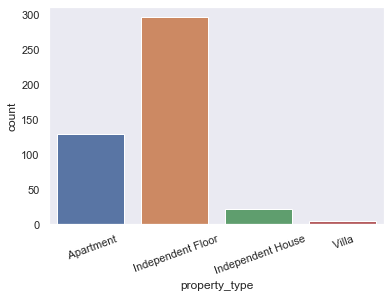

<Figure size 432x288 with 0 Axes>

In [70]:
plt.figure()
sns.set(rc={"axes.grid":False})
sns.countplot(df1.property_type)
plt.xticks(rotation = 20)
plt.show()
plt.savefig('pic2.png')

In [72]:
a = df1.property_type.value_counts()
a

 Independent Floor    297
 Apartment            129
 Independent House     22
 Villa                  4
Name: property_type, dtype: int64

<Figure size 432x288 with 0 Axes>

([<matplotlib.patches.Wedge at 0x22ad5138cd0>,
 [Text(-0.5210631321326393, 0.9687585934236268, ' Independent Floor'),
  Text(0.33846410086232814, -1.0466336763297157, ' Apartment'),
  Text(1.0761738525679028, -0.22770559731626705, ' Independent House'),
  Text(1.0995749146786318, -0.030577884319880975, ' Villa')],
 [Text(-0.2842162538905305, 0.528413778231069, '66%'),
  Text(0.18461678228854259, -0.5708910961798448, '29%'),
  Text(0.5870039195824924, -0.12420305308160019, '5%'),
  Text(0.5997681352792535, -0.01667884599266235, '1%')])

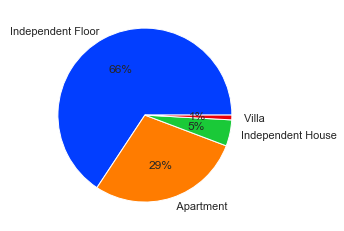

<Figure size 432x288 with 0 Axes>

In [71]:
plt.figure()
colours = sns.color_palette('bright')[0:5]
labels = a.keys()
plt.pie(a, colors = colours, labels = labels, autopct='%.0f%%')
plt.show()

#### In the given data of 452 rows:
- 66% properties are Independent Floor
- 29% properties are Apartment
- 5% properties are Independent House
- 1% properties are Villa.

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='BHK'>

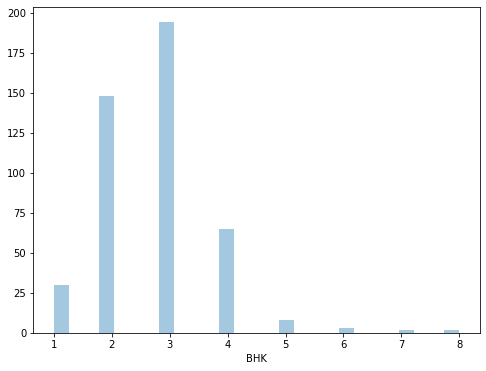

In [64]:
plt.figure(figsize = (8,6))
sns.distplot( a=df1["BHK"], hist=True, kde=False, rug=False )
plt.savefig('pic1.png')

### In the given data:
- majority of properties are 3 BHK
- followed by 2 BHK and then 4 BHK and so on.
- and there are very few properties which have more than 4 BHK.

<AxesSubplot:xlabel='bathroom_details', ylabel='Density'>

<function matplotlib.pyplot.show(close=None, block=None)>

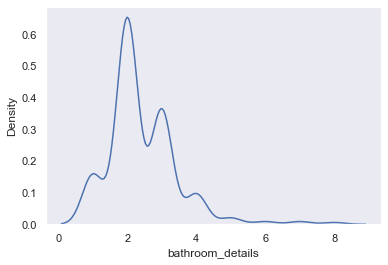

In [74]:
sns.kdeplot(df1['bathroom_details'])
sns.set(rc={"axes.grid":False})
plt.show
plt.savefig('pic2.png')

### In the given data:
- Most of the house have 2 bathrooms and 3 bathrooms
- a very few house have 1 and 4 bathrooms

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_in_lakh'>

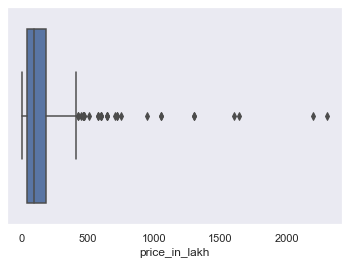

In [75]:
sns.boxplot(df1['price_in_lakh'])

> In the given dataset price of the properties lies from 25 lakh to 2 crore and there are so many outliers in data set.

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_sq_ft'>

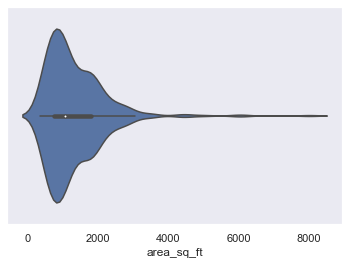

In [76]:
sns.violinplot(df1['area_sq_ft'])

> In the given data area of properties lies between 500 sq ft to 2000 sq ft.

In [77]:
df1.head()

,property_type,location,city,price_in_lakh,BHK,area_sq_ft,construction_status,bathroom_details,property_status
3,Apartment,"Hastsal,",Delhi,62.0,5,2000.0,Ready to move,3,Resale
4,Independent Floor,"Mahipalpur,",Delhi,35.0,2,765.0,Ready to move,1,Resale
5,Independent Floor,"Pitampura,",Delhi,45.0,3,600.0,Ready to move,1,Resale
6,Apartment,"Jamia Nagar,",Delhi,42.0,3,850.0,Ready to move,2,Resale
7,Apartment,"Dilshad Garden,",Delhi,60.0,3,1000.0,Ready to move,2,Resale


In [78]:
df.location.nunique()

123

In [80]:
b = df1.construction_status.value_counts()
b

Ready to move         428
Under Construction     24
Name: construction_status, dtype: int64

([<matplotlib.patches.Wedge at 0x22ad2de62e0>,
 [Text(-1.084731332677722, 0.1826415503307329, 'Ready to move'),
  Text(1.0847313198526172, -0.18264162650064, 'Under Construction')],
 [Text(-0.5916716360060301, 0.0996226638167634, '95%'),
  Text(0.5916716290105184, -0.09962270536398544, '5%')])

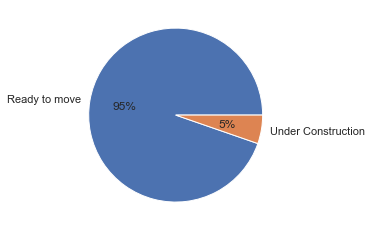

In [81]:
plt.pie(b, labels = b.keys(), autopct='%.0f%%')
plt.show()

### In the given dataset:
- 94% of house are ready as majority of house are on resale.
- whereas only 6% properties are under construction.

In [82]:
d = df1.property_status.value_counts()
d

Resale    329
New       123
Name: property_status, dtype: int64

([<matplotlib.patches.Wedge at 0x22ad4ad44c0>,
 [Text(-0.7219214003617295, 0.829957524033465, 'Resale'),
  Text(0.7219214780679574, -0.8299574564423022, 'New')],
 [Text(-0.3937753092882161, 0.45270410401825356, '73%'),
  Text(0.39377535167343125, -0.4527040671503466, '27%')])

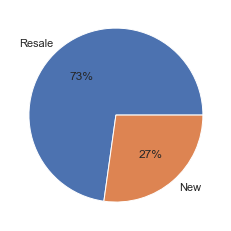

In [83]:
plt.pie(d, labels = d.keys(), autopct='%.0f%%')
plt.show()

> Interpretation:- In the given dataset majority of properties are old as they are on resale whereas very few properties are new.  

## Bivariate

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='area_sq_ft', ylabel='price_in_lakh'>

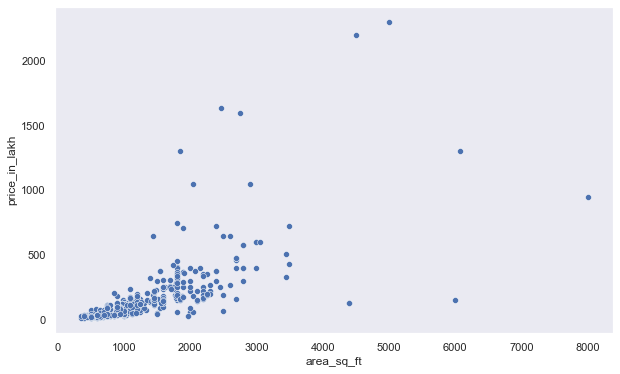

In [84]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = df1.area_sq_ft, y = df1.price_in_lakh)

> Interpretation :- Here we cannot able to observe proper relation between size of the property and price of the property as the there are so many factors which affect the price too like location and other facilities.
But there is still a positive relation between area and price.

<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='BHK', ylabel='price_in_lakh'>

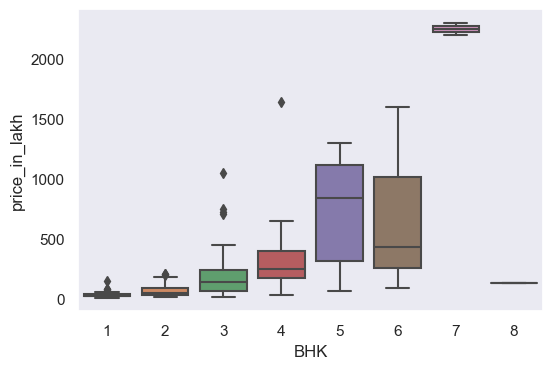

In [85]:
plt.figure(dpi = 100)
sns.boxplot(x = df1.BHK, y = df1.price_in_lakh)

> Interpretation :- There is positive relation between BHK and price as the number of BHK is increasing so the price is also increasing whereas we can also see an exception at 8 and 9 BHK where price is lesser.
- There are some outliers which of because if the places.

<AxesSubplot:xlabel='BHK', ylabel='bathroom_details'>

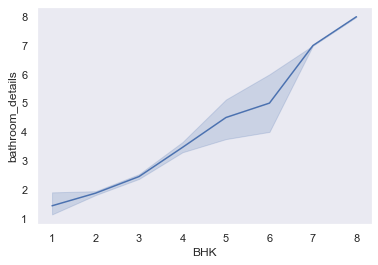

In [86]:
sns.lineplot(x=df1["BHK"], y=df1["bathroom_details"])

> Interpretation :- There is a positive relation Between BHK and number of Bathrooms.

<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='property_status', ylabel='price_in_lakh'>

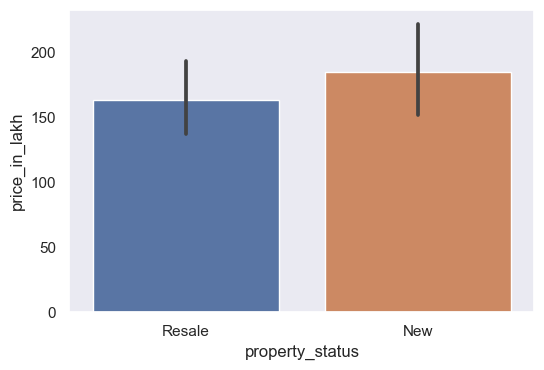

In [87]:
plt.figure(dpi = 100)
sns.barplot(x = df1.property_status, y = df1.price_in_lakh)

> Interpretation :- prices of new properties are higher than those properties which are on resale.

<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='bathroom_details', ylabel='price_in_lakh'>

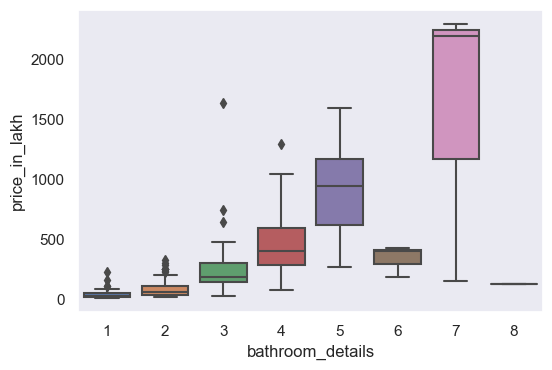

In [88]:
plt.figure(dpi = 100)
sns.boxplot(x = df1.bathroom_details, y = df1.price_in_lakh)

> Interpretation:- There is positive relation between price and number of bathroom. whareas there are some exception are also present in data set.

<Figure size 480x320 with 0 Axes>

<AxesSubplot:xlabel='property_type', ylabel='price_in_lakh'>

(array([0, 1, 2, 3]),
 [Text(0, 0, ' Apartment'),
  Text(1, 0, ' Independent Floor'),
  Text(2, 0, ' Independent House'),
  Text(3, 0, ' Villa')])

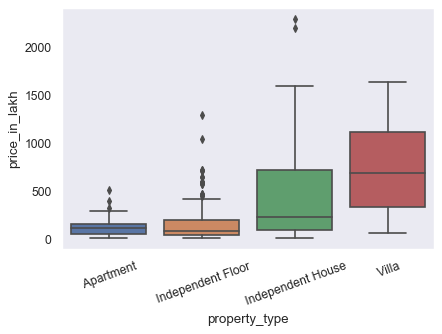

In [90]:
plt.figure(dpi = 80)
sns.boxplot(x = df1.property_type, y = df1.price_in_lakh)
plt.xticks(rotation = 20)

> Interpretation :- 
- Villa is the costliest property.
- Independent house prices lies from 1 crore to 8 crore.
- There is not must difference between the prices of Apartment and Independent Floors.
- But there are too many outliers in Independent floors.
- There are very few Villa.

<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='property_type', ylabel='BHK'>

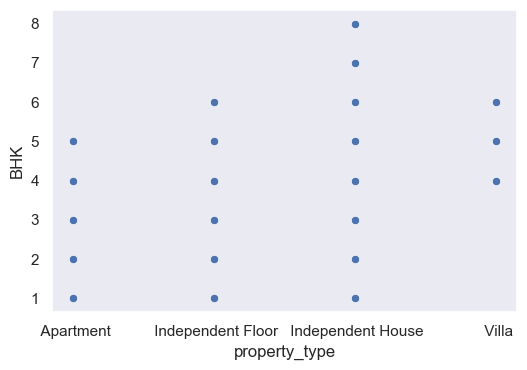

In [91]:
plt.figure(dpi = 100)
sns.scatterplot(x = df1.property_type, y = df1.BHK)

> Interpretation :- 
- Apartments size lies from 1 BHK to 5 BHK.
- Independent floor size lies from 1 BHK to 6 BHK.
- Independent house lies from 1 BHK to 8 BHK.
- Villa size lies from 4 BHK to 6 BHK.

<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='property_type', ylabel='area_sq_ft'>

(array([0, 1, 2, 3]),
 [Text(0, 0, ' Apartment'),
  Text(1, 0, ' Independent Floor'),
  Text(2, 0, ' Independent House'),
  Text(3, 0, ' Villa')])

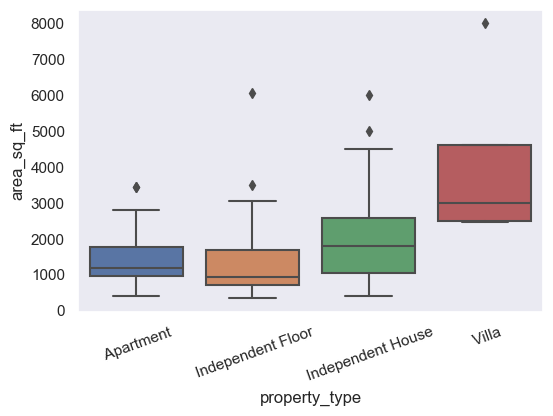

In [95]:
plt.figure(dpi = 100)
sns.boxplot(x = df1.property_type, y = df1.area_sq_ft)
plt.xticks(rotation = 20)

> Interpretation:-
- Apartments area lies between 200 sq ft to 3000 sq ft with median 1800 sq ft.
- Independent floor area lies between 800 sq ft to 1800 sq ft with median 1000 sq ft.
- Indepedent House area lies between 800 sq ft to 6000 sq ft with median 1800 sq ft.
- Villa area lies between 2500 sq ft to 3200 sq ft with median 2500 sq ft.

<Figure size 720x432 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

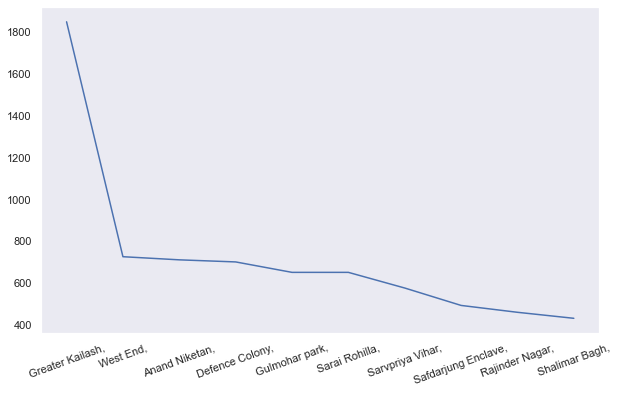

In [96]:
plt.figure(figsize = (10,6))
plt.plot(df1.groupby('location')['price_in_lakh'].mean().nlargest(10))
plt.xticks(rotation = 20)

> Interpretation :- According to given data set Greater Kailash, West End, Anand Niketan, Defence Colony, Gulmohar Park, Sarai Rohilla, Sarvpriya Vihar, Safdarjung Enclave, Rajinder Nagar and Shalimar Bagh are the Costliest area in Delhi for buying Property.

<Figure size 864x432 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

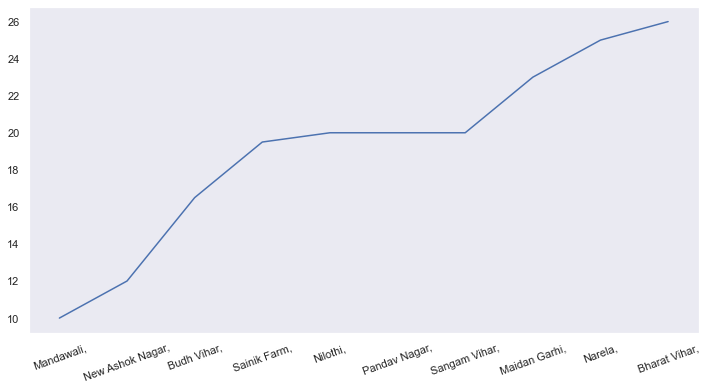

In [98]:
plt.figure(figsize = (12,6))
plt.plot(df1.groupby('location')['price_in_lakh'].mean().nsmallest(10))
plt.xticks(rotation = 20)
plt.savefig('pic4.png')

> Interpretation :- According to given data set Vinod Nagar North, Budh Vihar, Sainik Farm, Burari, Sangam Vihar, Sector 1 Rohini, Sagar Pur, Mansa Ram Park, Narela, Bharat Vihar are the cheapest are in Delhi for buying Property.

<Figure size 720x432 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

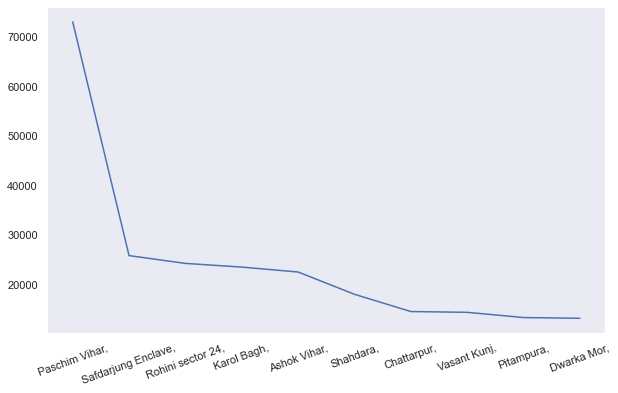

In [99]:
plt.figure(figsize = (10,6))
plt.plot(df1.groupby('location')['area_sq_ft'].sum().nlargest(10))
plt.xticks(rotation = 20)

> Interpretation:- Paschim Vihar, Rohini sector 24, Ashok Vihar, Sector 12 Dwarka, Safdarjung Enclave, Karol Bagh, Shahdara, Vasant Kunj, Dwarka Mor and Sector 6 Dwarka are the top 10 places which has alot of space on sale.

<Figure size 720x432 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

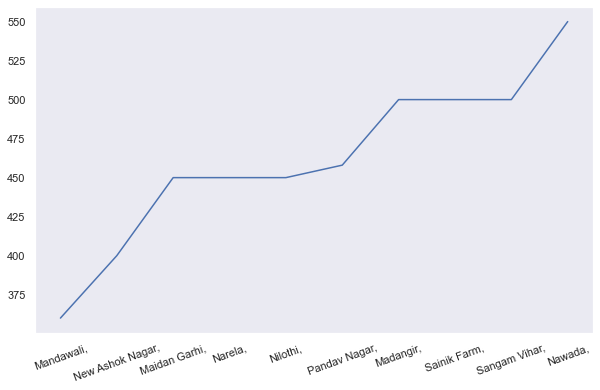

In [100]:
plt.figure(figsize = (10,6))
plt.plot(df1.groupby('location')['area_sq_ft'].sum().nsmallest(10))
plt.xticks(rotation = 20)

> Interpretation:- Vinod Nagar Nath, Maidan Garhi, Narela, Madangir, Sainik Farm, Sangam Vihar, Nawada, Sector 20 Rohini, Khirki Extension, Rohini sector 5 are the top 10 places which has least of space on sale.

<Figure size 720x432 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

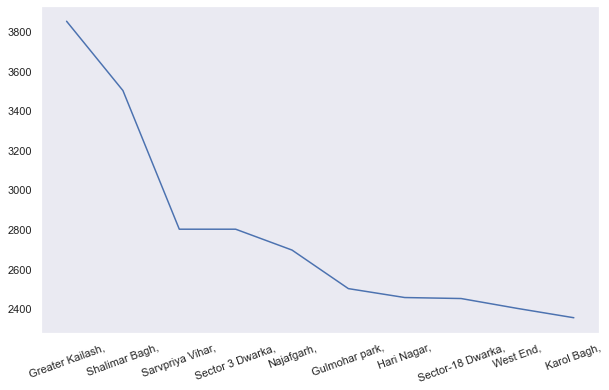

In [101]:
# Biggest Properties in terms of area
plt.figure(figsize = (10,6))
plt.plot(df1.groupby('location')['area_sq_ft'].mean().nlargest(10))
plt.xticks(rotation = 20)

> Interpretation:- Greater Kailash, Shalimar Bagh, Defence colony, Sarvpriya Vihar, Sector-18 Dwarka, Najafgarh, Gokalpur, Gulmohar park, Karol Bagh, Hari Nagar top 10 biggest properties in terms of area belongs to these places.

<Figure size 720x432 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

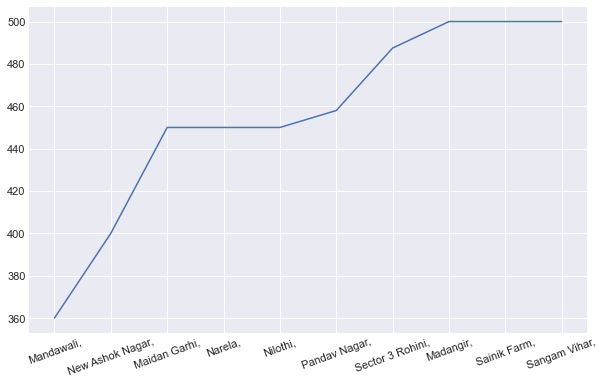

In [108]:
# smallest properties in terms of area
plt.figure(figsize = (10,6))
plt.plot(df1.groupby('location')['area_sq_ft'].mean().nsmallest(10))
plt.xticks(rotation = 20)
plt.savefig('pic5.png')

> Interpretation:- Mandawali, New Ashok Nagar, Maidan Garhi, Narela, Nilothi, Pandav Nagar, Sector 3 Rohini, Madangir, Sainik Farm and Sangam Vihar 
top 10 smallest properties in terms of area belongs to these places.

## Multivariate

> Interpretation:- we can see that price of new properties are increasing with the increase in area whereas prices of old properties are not correlated with area.

In [105]:
p = df1[['price_in_lakh', 'area_sq_ft', 'BHK', 'bathroom_details']]

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

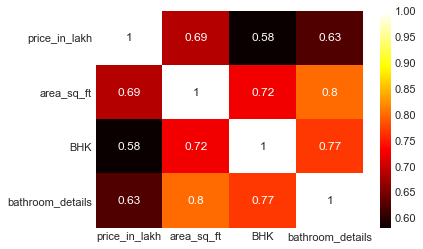

In [106]:
# Correlation between Price, Area, BHK and Bathroom details of properties
plt.figure(figsize =(6,4))
c = p.corr()
sns.heatmap(c, annot = True, cmap = 'hot')

> Interpretation:-
- All the variables are positively correlated to each other.

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

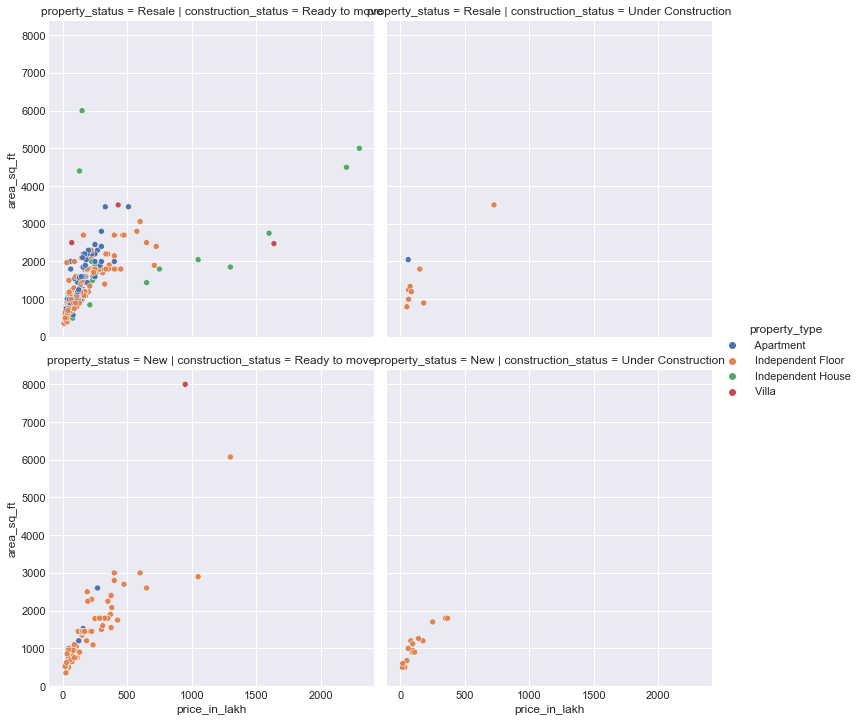

In [107]:
plt.figure()
sns.relplot(x = 'price_in_lakh', y = 'area_sq_ft', data = df, kind = 'scatter', row = 'property_status', col = 'construction_status', hue = 'property_type')

> Interpretation:-
- Most apartments are on resale and ready to move. there are very few which belongs to other three category.
- Independent floor is present in all four categories.
- There is no new independent home all are on resale and ready to move.

> Summary
- In the given data set average price of the properties are 1.77 crore. minimum price is 12 lakh whereas maximum is 23 crore so we can properlt see that data is distributed.
- Maximum BHK in houses is 8 and minimum is 1 and average is 3 BHK.
- Maximum square feet is 6075 where as the minimum is 350. we can see that the data is distributed.
- Bathroom details are quiet similar too BHK.
- According to the dataset Greater Kailash is the most expensive place to buy property in Delhi.
- Vinod Nagar North is the cheapest place to buy property in Delhi.
- Independent floors are the highest in all property types.
- Bathrooms in the properties are highly correlated with the size of property.